In [33]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from gensim.models import word2vec
import numpy as np
import gensim
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from gensim import corpora
from gensim import models

In [21]:
data = pd.read_csv('data_cleaned.csv', delimiter=',')
data

,Unnamed: 0,id,user_login,body,path,commit_id,in_reply_to_id,repo_full_name
0,0,121,agramfort,spaces after commas thanks,scikits/learn/svm/src/liblinear/_liblinear.pyx,e5291691809e5b4d35eb46af77680a85ebbe9976,0,NaN
1,1,122,agramfort,are you sure about cfort is does not appear e...,scikits/learn/svm/src/liblinear/liblinear_help...,e5291691809e5b4d35eb46af77680a85ebbe9976,0,NaN
2,2,1161,elupus,any reason this check is removed should we no...,xbmc/dbwrappers/Database.cpp,d153d81a509e00ecbc10d636ebbbd11ae7b562e5,0,NaN
3,3,1252,jmarshallnz,yup - look up for internal_version this inli...,xbmc/dbwrappers/Database.cpp,d153d81a509e00ecbc10d636ebbbd11ae7b562e5,0,NaN
4,4,1551,agramfort,does or does not,doc/developers/neighbors.rst,25ef0935eea6de67c1574b61510c6715953733a1,0,NaN
...,...,...,...,...,...,...,...,...
99995,99995,18391536,jamtur01,invoke,docs/sources/reference/builder.md,98ceae1a8499979f725bd04dfbc47ccf831331a7,0,NaN
99996,99996,18391553,jamtur01,invoke,docs/sources/reference/builder.md,98ceae1a8499979f725bd04dfbc47ccf831331a7,0,NaN
99997,99997,18391566,jamtur01,invoke,docs/sources/reference/builder.md,98ceae1a8499979f725bd04dfbc47ccf831331a7,0,NaN
99998,99998,18391634,jamtur01,or VAR,docs/sources/examples/running_ssh_service.md,1cc35466f288384fb5c0c8a75d45a8d56e840d27,0,NaN


In [6]:
wordVec = gensim.models.KeyedVectors.load_word2vec_format("word2Vec.bin", binary=True)
wordVec['-']

array([ 0.21260378,  0.09926204, -0.42197123,  0.07171463, -0.11635962,
       -0.1587817 , -0.22813904, -0.40599933,  0.10550229, -0.02989995,
        0.29662153,  0.07556977, -0.31014094,  0.1351672 ,  0.5043207 ,
        0.1870861 ,  0.02517163, -0.21897951, -0.01298134,  0.03930113,
       -0.27110675, -0.14548273,  0.19351892,  0.607968  , -0.38757592,
       -0.07881724,  0.07387956,  0.32218164, -0.02288199,  0.18185848,
       -0.15622565, -0.23542303,  0.01394012, -0.01565598, -0.02710978,
       -0.1132633 ,  0.23187968,  0.02718084, -0.49805453,  0.15765472,
       -0.13148794, -0.07154568,  0.0538125 ,  0.18598424,  0.1474826 ,
        0.25623986,  0.17495002, -0.28342375,  0.13444032,  0.2659585 ,
        0.06289336, -0.12813604,  0.24312884, -0.03483532,  0.08115482,
        0.32567513,  0.10803639, -0.55382454, -0.32812965, -0.06610359,
       -0.46951994, -0.05389235, -0.16940878,  0.19074863,  0.34751576,
        0.21043657, -0.11064307,  0.11307571, -0.08642122,  0.08

In [7]:
sentences = np.load("sentences.npy")
sentences[0]

array([ 0.02774239,  0.16575766, -0.31319333,  0.17946357,  0.02485174,
       -0.16075351, -0.06282411, -0.09537544,  0.01586559, -0.00509875,
       -0.27884047,  0.32087677, -0.01700382,  0.16575594, -0.19591502,
        0.40138265,  0.2075412 ,  0.12191047,  0.15799911, -0.04422868,
       -0.32020175,  0.01320735,  0.25614699, -0.24586379, -0.49924347,
       -0.41935074,  0.08263077,  0.05711561, -0.15952523, -0.06189486,
       -0.13357191,  0.33550413, -0.0649945 ,  0.14911127, -0.14400562,
       -0.5227334 ,  0.28935875, -0.28232474, -0.0823628 ,  0.09847927,
       -0.23040136, -0.11467727, -0.10678585, -0.12252446,  0.03523265,
        0.03419405,  0.13339036, -0.20008489,  0.26864238, -0.1545718 ,
        0.12447099, -0.19348758,  0.26327304, -0.31910456,  0.04575398,
       -0.29995403,  0.23620575,  0.24094101, -0.06088914, -0.12883687,
       -0.45787011, -0.37160794, -0.06510864,  0.11160031, -0.04689757,
        0.10600913,  0.10576841,  0.43407408, -0.01146152,  0.08

In [8]:
# 降维，可视化前1000个句子向量
pca = PCA(n_components=2)
result = pca.fit_transform(sentences[0:1000])

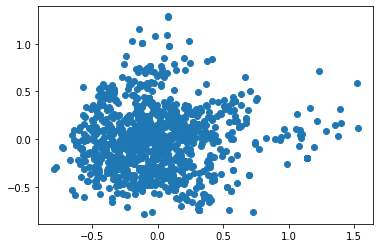

In [11]:
plt.scatter(result[:, 0], result[:, 1])

In [41]:
clusters = 50

In [42]:
# 句子向量聚类
# n_clusters=100 表示分100个类
kmeans = KMeans(n_clusters=clusters, random_state=1).fit(sentences)

In [43]:
y_pred = kmeans.labels_
cluster_center = pd.DataFrame(kmeans.cluster_centers_)
x_out = pd.DataFrame(sentences,index=kmeans.labels_)
x_outwithcenter=x_out.append(cluster_center)

In [44]:
center_dict = Counter(y_pred)
center_dict

Counter({5: 1001,
         6: 5225,
         1: 4941,
         21: 2919,
         29: 2386,
         12: 4185,
         48: 6211,
         9: 1060,
         40: 1640,
         43: 2183,
         20: 9923,
         2: 5012,
         19: 7827,
         37: 7442,
         23: 1032,
         11: 826,
         4: 2258,
         32: 578,
         41: 2060,
         39: 1259,
         45: 212,
         25: 2474,
         13: 1692,
         42: 2248,
         30: 648,
         47: 356,
         10: 1905,
         34: 617,
         22: 2042,
         7: 1568,
         46: 221,
         44: 1334,
         26: 1007,
         8: 2238,
         28: 289,
         3: 624,
         31: 1176,
         33: 843,
         14: 313,
         36: 848,
         15: 1263,
         49: 539,
         0: 994,
         38: 1025,
         35: 569,
         27: 680,
         16: 584,
         17: 824,
         18: 372,
         24: 527})

In [18]:
#用TSNE进行数据降维并展示聚类结果
tsne = TSNE()
tsne.fit_transform(x_outwithcenter) #进行数据降维,并返回结果
x_tsne = pd.DataFrame(tsne.embedding_, index = x_outwithcenter.index)
#将index化成原本的数据的index，tsne后index会变化

In [19]:
# 第0个聚类的center
d = x_tsne[x_tsne.index == 0].tail(1)
d

,0,1
0,1.046052,-8.145334


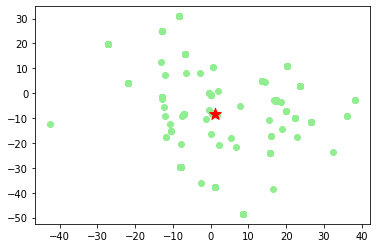

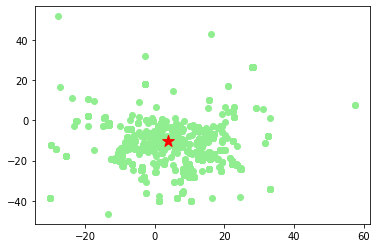

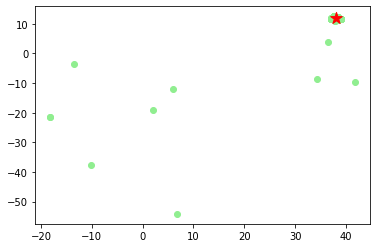

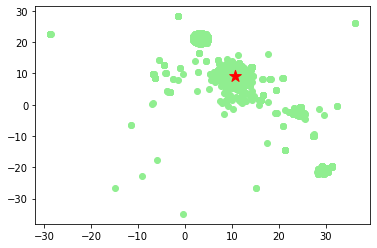

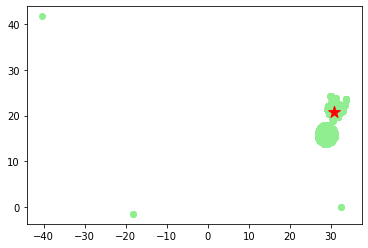

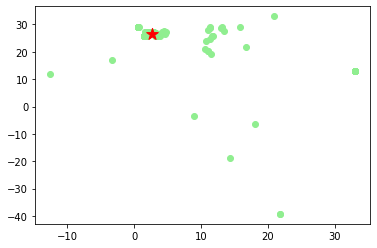

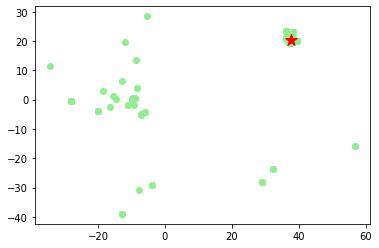

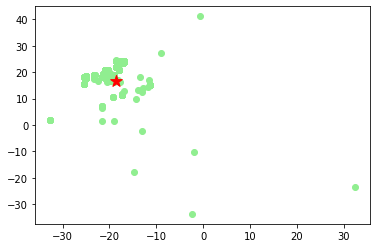

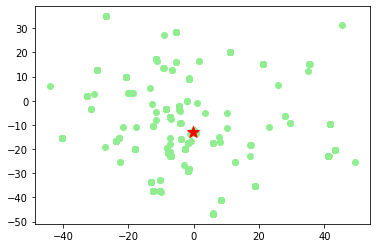

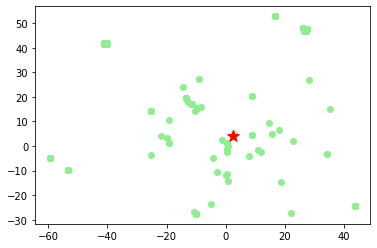

In [20]:
for i in range(10): 
    d = x_tsne[x_tsne.index == i]     #找出聚类类别为0的数据对应的降维结果
    plt.scatter(d[0], d[1],c='lightgreen', marker='o')
    d = x_tsne[x_tsne.index == i].tail(1)
    plt.scatter(d[0], d[1], c='red',s=150, marker='*')
    plt.show()

In [45]:
res0Series = pd.Series(kmeans.labels_)
res0 = res0Series[res0Series.values == 1]
res0.index

Int64Index([    2,    26,    35,    72,    96,   100,   118,   132,   147,
              151,
            ...
            99806, 99826, 99834, 99849, 99917, 99924, 99932, 99955, 99962,
            99978],
           dtype='int64', length=4941)

In [46]:
# 原始语料
longcontents = []
for i in range(clusters):
    longcontent = ""
    for item in res0Series[res0Series.values == i].index:
        longcontent = longcontent + " " + str(data['body'][item])
    longcontents.append(longcontent)
len(longcontents)

50

In [63]:
# 分词
seg_list = []
for i in range(len(longcontents)):
    tempseg = []
    for word in longcontents[i].split(' '):
        if word is not ' ' and word is not '':
            tempseg.append(word)
    seg_list.append(tempseg)
len(seg_list)

50

In [64]:
seg_list[0]

['its',
 'not',
 'exactly',
 'the',
 'same',
 'an',
 'uncaught',
 'exception',
 'displays',
 'a',
 'lot',
 'of',
 'noise',
 'and',
 'its',
 'not',
 'always',
 'easy',
 'to',
 'spot',
 'the',
 'error',
 'message',
 'because',
 'the',
 'problem',
 'is',
 'quite',
 'common',
 'the',
 'message',
 'on',
 'the',
 'screen',
 'should',
 'be',
 'as',
 'short',
 'as',
 'possible',
 'from',
 'my',
 'experience',
 'people',
 'just',
 'dont',
 'get',
 'the',
 'error',
 'message',
 'from',
 'an',
 'exception',
 'message',
 '$this',
 'marktestskipped',
 'returns',
 'early',
 'since',
 'it',
 'throws',
 'an',
 'exception',
 'this',
 'interface',
 'was',
 'added',
 'to',
 'easily',
 'to',
 'determine',
 'if',
 'the',
 'encoder',
 'supports',
 'decoding',
 'without',
 'having',
 'to',
 'call',
 'the',
 'method',
 'and',
 'trigger',
 'an',
 'exception',
 '+1',
 'im',
 'having',
 'a',
 'parse',
 'error',
 'you',
 'should',
 'extend',
 'VAR',
 'level',
 'and',
 'add',
 'an',
 'interface',
 'implemented',
 

In [65]:
dictionary = corpora.Dictionary(seg_list)  #生成字典,且对词语编号Id
for key,value in dictionary.items():
    print(key,value)

0 #
1 #10811
2 #11630
3 #19820
4 #19844
5 #2106
6 #define
7 #ifdef
8 $class
9 $group
10 $items
11 $this
12 %0
13 %r
14 %s
15 &
16 &q[0
17 **must
18 **not**
19 **stof**
20 +
21 +1
22 -
23 -1
24 -deprecation
25 -javadoc
26 -std=c++11
27 -v
28 -x
29 0
30 0]
31 1
32 10
33 100%
34 1000
35 109
36 113
37 126
38 157]
39 19
40 1f
41 2
42 2+
43 2-m3
44 200
45 201103l
46 27
47 294
48 3
49 3+
50 3enwriting-tests-for-phpunit
51 3rd
52 4
53 400
54 4xx
55 5
56 6
57 64
58 7
59 8-bit
60 8500
61 9
62 94
63 95%
64 ;
65 <
66 <-
67 <=
68 <=50%
69 =
70 ==
71 ==0
72 =>
73 =}
74 >
75 >=
76 @
77 @akalyaev
78 @apollo13
79 @carlosantoniodasilva
80 @devs
81 @dmaloney-r7
82 @dmp42
83 @eriksencosta
84 @helmer
85 @jet47
86 @jfcixmedia
87 @jlee-r7
88 @jtratner
89 @koc
90 @lyrixx
91 @mtrbean
92 @ndm2
93 @niklasf
94 @ocramius
95 @ogrisel
96 @phproberto
97 @rafaelfranca
98 @rkuhn
99 @speclad
100 @stloyd
101 @stof
102 @timgraham
103 @tobion
104 @unclejack
105 @zpao
106 JSCODE
107 MDCODE
108 PHPCODE
109 PYCODE
110 PYXCODE

1480 mbstring
1481 me
1482 mean
1483 meaningful
1484 means
1485 meant
1486 measured
1487 mem
1488 memory
1489 mention
1490 mentioned
1491 mentioning
1492 mentionned
1493 mess
1494 message
1495 messagedelivery
1496 messages
1497 messenger
1498 meta
1499 metadata
1500 meterpreter
1501 method
1502 methods
1503 methods;
1504 metric
1505 microsoft
1506 middleware
1507 might
1508 migration
1509 mihis
1510 mime
1511 mimic
1512 mimics
1513 mind
1514 mingw32-g++
1515 minmax
1516 minor
1517 minus
1518 misleading
1519 misreading
1520 miss
1521 missed
1522 missing
1523 misspelling
1524 mistakes
1525 misuse
1526 mixups
1527 mkdir
1528 mocha
1529 mode
1530 model
1531 modeltable
1532 modified
1533 module
1534 modules
1535 monkey
1536 more
1537 most
1538 mostly
1539 move
1540 moved
1541 movie
1542 msftidy
1543 msg
1544 much
1545 multi-class
1546 multi-label
1547 multi-output
1548 multi-word
1549 multinomial
1550 multipart
1551 multiple
1552 must
1553 mustcompile
1554 mutex
1555 my
1556 myself
1557 mys

2983 537
2984 538
2985 540
2986 556
2987 577
2988 6+
2989 6-8
2990 60
2991 60+
2992 61
2993 64bit
2994 64bits
2995 68824
2996 68d04775-ea08-4f16-ba95-06344f2819efakka
2997 69
2998 6;
2999 70
3000 70%
3001 700ns
3002 720
3003 72817
3004 74208af3f47537673dcbe258f6393f2bca411cdb
3005 749
3006 79
3007 8
3008 80
3009 80%
3010 800
3011 803
3012 804
3013 823
3014 9*th
3015 90
3016 90%
3017 900
3018 911
3019 922
3020 956
3021 98
3022 99
3023 99%
3024 997
3025 99999
3026 999ms
3027 ;-
3028 ;version=[2
3029 =0
3030 ==1
3031 ===
3032 =~
3033 @admad
3034 @agramfort
3035 @akaariai
3036 @alanwww1
3037 @amueller
3038 @antograssiot
3039 @arnova
3040 @arthurnn
3041 @asm89
3042 @bamarni
3043 @bantonsson
3044 @beberlei
3045 @birkirb
3046 @bormotov
3047 @bschussek
3048 @christiangaertner
3049 @cpcloud
3050 @creack
3051 @crosbymichael
3052 @davilla
3053 @dgt41
3054 @discordianfish
3055 @dlsniper
3056 @drak
3057 @drewhk
3058 @elupus
3059 @fabianp
3060 @fabpot
3061 @file_on_target
3062 @fran6co
3063 @freakbo

4349 comwchen-r7metasploit-frameworkblob1350cd5a81da9abf137bb394471172e7b376166fmodulesauxiliaryanalyzejtr_linux
4350 comxbmcxbmcblobmasterxbmccoresdvdplayerdvdcodecsvideovdpau
4351 comxbmcxbmcblobmasterxbmcnetworkosxzeroconfosx
4352 comxbmcxbmcpull3326files#l3r180
4353 comximagefile
4354 concat
4355 concatenate
4356 concatfaster
4357 conceivable
4358 concepts
4359 concern
4360 concerned
4361 concerning
4362 concise
4363 concluded
4364 conclusions
4365 concrete
4366 concurrency
4367 concurrent
4368 concurrenthashmap
4369 concurrenthasmap
4370 concurrentlinkedqueue
4371 concurrently
4372 concurrentskiplistset
4373 concurrentsocketactor
4374 condition-waitspin
4375 conditional
4376 conditionally
4377 conditionals
4378 conditionvariable
4379 condvar
4380 conf
4381 confidence
4382 confident
4383 confidential
4384 configs
4385 configurabl
4386 configurable
4387 configurations
4388 configurators
4389 configure
4390 configurenotify
4391 configures
4392 configuring
4393 confirm
4394 confirmati

5969 hsbsfsbshtabftab
5970 html
5971 html#applying-with-a-panel
5972 html#customconversionspecifier
5973 html#datatype-interval-output
5974 html#sender-resolution
5975 html#xlrd
5976 html5
5977 htmlcontentloadcomplete
5978 htmlphp
5979 html”
5980 http1
5981 http2
5982 http2codecutil
5983 http2frameobserver
5984 http2headers
5985 http_request
5986 httpclient
5987 httpresponse
5988 httpserver
5989 huber
5990 hud
5991 hudparolled
5992 huge
5993 huh
5994 hulu
5995 humans
5996 humm
5997 hundred
5998 hundredsthousands
5999 hurt
6000 hw
6001 hygienic
6002 hyperparams
6003 hypothesis
6004 hypothetically
6005 hz
6006 i18n
6007 i18n-wise
6008 icky
6009 icon
6010 icon_state
6011 iconics
6012 icons
6013 ideal
6014 ideally
6015 ideas
6016 idempotent
6017 idempotentconsumerregistry
6018 ident
6019 identical
6020 identified
6021 identifier
6022 identifying
6023 identifyreqest
6024 identifyrequest
6025 identifytimer
6026 identity
6027 identityprocessor
6028 idiot
6029 idirectsoundbuffer
6030 idk
6031 

7349 organize
7350 organs
7351 orgbrowsesi-7172
7352 orgdocfunctionsdump
7353 orgdocs9
7354 orghtmlrfc4642#section-2
7355 orgpandas-docsdevbasics
7356 orgpkgencodingbinary
7357 orgsrcpkgsyscallnetlink_linux
7358 orgticket11324
7359 orgwikiexponential_decay#half-life
7360 orgwikimoving_average#exponential_moving_average
7361 orig
7362 origin
7363 original_contribute_to_class
7364 origins
7365 orm
7366 orthogonal
7367 osd
7368 osgi
7369 oss
7370 osvdb
7371 osx
7372 ot
7373 other;
7374 othewise
7375 otoh
7376 ought
7377 oui_fullname
7378 ouput
7379 ourselves
7380 out-of-bag
7381 out-of-sync
7382 outboundbuffer
7383 outboundsession
7384 outdated
7385 outed
7386 outer
7387 outgoing
7388 output_weights
7389 outputs
7390 outputted
7391 outsite
7392 outstanding
7393 outweigh
7394 outweighs
7395 over-run
7396 over-writable
7397 overall
7398 overflow
7399 overflows
7400 overhauling
7401 overhead
7402 overlap
7403 overlapping
7404 overlay
7405 overlays
7406 overload
7407 overloading
7408 overly
7

8849 spawn
8850 spawned
8851 spawning
8852 spawns
8853 spdy3
8854 speak
8855 speaker
8856 speaking
8857 spec
8858 specialization;
8859 species
8860 speed-up
8861 speeded
8862 speeding
8863 speeds
8864 speedup
8865 speficies
8866 spelled
8867 spelling
8868 spent
8869 spi
8870 spin
8871 spinner
8872 spinning
8873 spirit
8874 splfileinfo
8875 splfileobject
8876 splheap
8877 splice
8878 splitting
8879 splobjectstorage
8880 splpriorityqueue
8881 spoil
8882 spots
8883 spotted
8884 spray
8885 spread
8886 sprint
8887 sprintf
8888 sql
8889 sqlalchemy
8890 sqli
8891 sqlite
8892 square
8893 squeezebox
8894 src
8895 srv
8896 ssdp
8897 sshd
8898 ssizesize
8899 ssl
8900 ssl-ca
8901 ssldone
8902 ssltlscipher
8903 ssrc
8904 stab
8905 stabilization
8906 stabilize
8907 stablish
8908 stacks
8909 stacktrace
8910 stage
8911 stage2
8912 stager
8913 stages
8914 stale
8915 stall
8916 stamp
8917 standalone
8918 standardized
8919 stands
8920 standup
8921 start-up
8922 start_time
8923 startcluster
8924 started_


10103 $password
10104 $path
10105 $pathinfo
10106 $prefix
10107 $requiredschemes
10108 $requirements
10109 $response
10110 $state;
10111 $statustexts
10112 $strict
10113 $success
10114 $tasks
10115 $trustedheaders
10116 $type
10117 $u
10118 $usetable
10119 $value
10120 %lu
10121 %ss
10122 %x
10123 &block
10124 &item
10125 &node{}
10126 &s]|
10127 &text
10128 **a**
10129 **accepts**
10130 **crashing
10131 **end**
10132 **exported**
10133 **flat**
10134 **function**
10135 **never**
10136 **repr**
10137 **return**
10138 **should**
10139 **start**
10140 **str**
10141 *class;
10142 *foo
10143 *lws
10144 *rule;
10145 *section_size
10146 ++i
10147 +invalid+
10148 -11
10149 -1}
10150 -2-1
10151 -h
10152 -inf
10153 -o
10154 -optimise
10155 0-rc1
10156 01
10157 016
10158 046
10159 047
10160 048
10161 05
10162 053
10163 054
10164 060
10165 0;
10166 0=>
10167 0=irb
10168 0_10-ea
10169 0cakeutilitytime
10170 0class-cake
10171 0d
10172 0teststestcaseormbehaviorregistrytest
10173 0x8000_0000
10174 1-

11848 m_resentmethod
11849 m_stereomode
11850 m_streamdetails
11851 m_strpassword
11852 m_strusername
11853 m_subtitle
11854 m_tag
11855 m_texture
11856 m_textureheight
11857 m_texturepitch
11858 m_thumbloaders
11859 m_vecitems
11860 macro-specific
11861 magic;
11862 mailing
11863 mailto
11864 maintainers
11865 make_classification
11866 make_unique
11867 makeptr<>
11868 makr
11869 male
11870 mallocd
11871 mandated
11872 mange
11873 mangle
11874 manifold
11875 manifolds
11876 manipulate
11877 manner
11878 manpage
11879 many_to_many
11880 manytomany
11881 map&
11882 map-reduce
11883 map2
11884 mapactions
11885 mapasyncprocessor
11886 mappings
11887 marc
11888 marier
11889 marks
11890 markup
11891 marley
11892 marshal-ing
11893 marshalling
11894 mat
11895 mat&
11896 matchdata
11897 materializes
11898 math
11899 mathematically
11900 matrices
11901 matrixes
11902 mattered
11903 max-tries
11904 maximal
11905 maxlength
11906 maxlength=0
11907 maxoutputlength
11908 mayaswell
11909 mbs
11910 me

13432 1enappendixes
13433 1f7c45823bb88318296c0db49b17013d6e8cadc5
13434 1javaio
13435 2025
13436 2026
13437 209
13438 21st
13439 257]
13440 2modulescamel
13441 2time
13442 3libdocbenchmarkrdocbenchmark
13443 4000
13444 45
13445 45]
13446 4cd2693340104d6d0bf5675e620924ab59a8afa9
13447 5encharset-binary-collations
13448 74
13449 7916
13450 7docsproperties
13451 80289;
13452 8080
13453 80c
13454 81
13455 86-100
13456 =number
13457 @ad7six
13458 @aditya-kapoor
13459 @alalek
13460 @alekcac
13461 @apfelbox
13462 @apotonick
13463 @bakual
13464 @bcrowe
13465 @bjonen
13466 @blast_hardcheese
13467 @brianmario
13468 @brianteeman
13469 @charettes
13470 @chenglou
13471 @cstoafer
13472 @dmathieu
13473 @evildmp
13474 @fabbot
13475 @fabien
13476 @fernetmenta
13477 @glouppe
13478 @hmoore-r7
13479 @houdini
13480 @idelpivnitskiy
13481 @ilya-lavrenov
13482 @jarshwah
13483 @jonatack
13484 @juanitofatas
13485 @marlinc
13486 @mjtamlyn
13487 @morisson
13488 @prolic
13489 @ramiro
13490 @robertlaytons
13491 @r

14892 asap
14893 aspected
14894 asserted
14895 audience
14896 aymerics
14897 baaah
14898 backoff
14899 backporting
14900 badchar
14901 beans
14902 bes
14903 boring
14904 branching
14905 brandon
14906 build;
14907 buitins
14908 burps
14909 c1dadf3d62d39fa8b1d837b71a3831d4edb46e0a
14910 cachefactory
14911 cachepool
14912 cf9
14913 check_simple
14914 checklist]
14915 claimed
14916 class;
14917 class_attribute
14918 classmethods
14919 clockwise
14920 clueless
14921 colordatetime
14922 comassets18934292208115096ea61e-997c-11e3-9f0b-8314cd94eb8e
14923 comdeependersinglarailscommit4acde5a7491eadc429da346b0b6a3690d2e22a6a
14924 comdjangodjangoblobe9103402c0fa873aea58a6a11dba510cd308cb84djangodbmodelsquery
14925 comdjangodjangoblobmasterdjangocontribauth__init__
14926 comdjangodjangocommiteade315da1c8372ac1dfcf1fd20ea87f454d71ac#commitcomment-4034261
14927 comendevinternalscontributingwriting-codesubmitting-patches#patch-review-checklist
14928 comiskandrparakeet
14929 comjoomlacoding-standardsb

16453 from_tuples
16454 frontend
16455 fs
16456 fsmref
16457 ftr
16458 fu
16459 fucking
16460 fudged
16461 fuel
16462 fulfills
16463 fulillment
16464 full-screen
16465 full-stack
16466 full-written
16467 fullness
16468 fumbles
16469 function;
16470 furnitures
16471 fussy
16472 futureelement
16473 futuresink
16474 g_graphiccontext
16475 gael
16476 gah
16477 gained
16478 gaining
16479 gamble
16480 game
16481 gd
16482 geez
16483 gels
16484 gemspec
16485 generate;
16486 generate_payload_exe
16487 generate_secret_key
16488 generatorinterface
16489 generators
16490 geneticists
16491 genjavadoc
16492 gentraversablefactory
16493 ger_once
16494 get*
16495 get_absolute_url
16496 get_attribute
16497 get_field
16498 get_indexer
16499 get_models
16500 getalbumartist
16501 getandset
16502 getappname
16503 getcause
16504 getchaptercount
16505 getclassloader
16506 getcolumntypes
16507 getconstraints
16508 getcontainer
16509 getdetails=true
16510 getengine
16511 geteventsubscribers
16512 geteventview
1

18014 user-side
18015 userpass
18016 userprovider
18017 usersomeactor
18018 utf8tostringcharset
18019 utilities
18020 utilized
18021 uuid_test
18022 uummm
18023 uv
18024 ux
18025 v2
18026 v5
18027 v6
18028 val==rep==prev
18029 valdation
18030 valid-hex
18031 validatesettings
18032 validatesort
18033 value_counts
18034 varchunk
18035 varcontents
18036 vardatumvisibility_chunkchunk
18037 varobjeffectdecalcleanabledirt
18038 varrundocker
18039 vars[name]
18040 varsiemens_coefficient
18041 varstdmean
18042 varying
18043 vast
18044 vbs
18045 vbscriptc-_nkng0yw8
18046 vc10
18047 vecfiles
18048 vector-space
18049 vectorizer
18050 vendors
18051 verdict
18052 vertex
18053 verylong
18054 vg
18055 viewpoint
18056 vigenère
18057 virtualalloc
18058 virtualconcrete
18059 visibilities
18060 visible-desktop
18061 vision
18062 visit
18063 viz
18064 vm_get_state
18065 vm_info
18066 vm_set_state
18067 vpn
18068 vprint_print_ing
18069 vps
18070 vtk
18071 vtks
18072 w3c
18073 wab
18074 waf
18075 wait=false

19507 eps-embedding
19508 es6
19509 escalations
19510 esteemed
19511 eta
19512 eventhough
19513 examine
19514 examplehow-to
19515 examplesplot_multilabel_evaluation
19516 excels
19517 exceptionally
19518 execdriver
19519 execting
19520 exp
19521 exponent
19522 expr[any]
19523 expr[t]
19524 extensibility
19525 facetious
19526 facilitate
19527 failuredetectorloader
19528 falsenone
19529 family
19530 favoured
19531 fieldgfketc
19532 fighting
19533 file_exists
19534 fileaccess
19535 fileclient
19536 fileitemhandler
19537 filetime
19538 filternot
19539 filure
19540 fin
19541 findclickedbutton
19542 fine;
19543 fists
19544 fixarguments
19545 flag]
19546 flatteningstrategy;
19547 flavoring
19548 flex
19549 flips
19550 fo
19551 focussed
19552 for-block
19553 force_text
19554 foreman
19555 forensically
19556 forkjoinpool-
19557 form-widget
19558 formats]
19559 formconfiginterface
19560 forwarded
19561 fr
19562 fr-fr
19563 fractionplaces
19564 frameworks
19565 from;
19566 full-example
19567 func

20894 messagestolog
20895 millions
20896 mime_types
20897 minlength
20898 minvalue
20899 misses
20900 module-level
20901 modulesexploitsunixwebappphp_eval
20902 modulesexploitswindowsbrowseradobe_utilprintf
20903 modulespythontest
20904 mov
20905 movement
20906 mr
20907 muche
20908 multi-language
20909 multiplications
20910 multithreading
20911 mvp
20912 myclass
20913 myobj
20914 nameerror
20915 nature_
20916 necesary
20917 necessitated
20918 nethttps
20919 neve
20920 never_
20921 newdesirable
20922 nextstate
20923 nickserv
20924 nodebox
20925 non-api
20926 non-compiled
20927 non-debug
20928 non-existant
20929 non-functional
20930 non-issue
20931 non-sense
20932 non-set
20933 non-sqlite
20934 non-transposed
20935 nonheap
20936 noseipdb
20937 not-using-require
20938 note[s]
20939 numberd
20940 numberless
20941 numerator
20942 objec
20943 ocl_run
20944 ofproperly
20945 oing
20946 one-for-one
20947 oneforonestrategy
20948 opcache
20949 opencv2core
20950 optaddressrange
20951 optomization


22596 htmlcodehintsunittests
22597 htmlcontentload
22598 http_build_query
22599 http_delay
22600 httpd
22601 httpproxy
22602 huawei
22603 hypothetical
22604 icelandic
22605 icon-16-language
22606 icondrawpng
22607 icu
22608 id=28285
22609 id=form
22610 identification
22611 idgeneratortrait
22612 ifaiu
22613 iftrue
22614 ii
22615 ijoystick
22616 image;
22617 image_file_dll
22618 image_file_system
22619 imaged
22620 imagefile
22621 img_jpg_normal
22622 img_jpg_progressive
22623 imp
22624 impacting
22625 implementation-specific
22626 implementedx
22627 implementors
22628 impure
22629 in_memory
22630 inactive
22631 inboundciphertextinput
22632 inboxpath
22633 include_path
22634 incompatable
22635 incrementally
22636 increments
22637 index-order
22638 inducing
22639 inevitably
22640 infered
22641 informat
22642 informed
22643 innermost
22644 innovation
22645 inout]
22646 inrefered
22647 insecure
22648 insertall
22649 install_
22650 instl_error_initialise_schema
22651 instrumenting
22652 int

23938 deprecatedinheritancedeprecatedoverriding
23939 deprecatednonfinal
23940 dialects
23941 differnce
23942 discern
23943 distinguishes
23944 do_hash
23945 doccomments
23946 droppable
23947 dropx
23948 dvdnavstreaminfo
23949 e015
23950 ehm
23951 electing
23952 enclosingmethod
23953 encoderdecoder
23954 encoderexception
23955 encodersobfuscators
23956 enourmous
23957 entitymanagerinterface
23958 enw
23959 error_type
23960 erstat
23961 evald
23962 events_map[save_after]
23963 events_map[save_before]
23964 excelwriterbase
23965 ext-intl
23966 extendedintl
23967 extrafiles
23968 factorized
23969 failing]
23970 faster;
23971 faucet
23972 fig
23973 figment
23974 filterdataevent
23975 filterrule
23976 final_field
23977 finalised
23978 findcuda
23979 fit_grid_point
23980 fluid
23981 flushxxx
23982 flyweight
23983 formevent
23984 formtypeguesserinterface
23985 frameworkextensions
23986 fully-applied
23987 function0
23988 functionpartialfunction
23989 furthers
23990 g_charsetconverter
23991 ge

25658 ae_ch_fl
25659 ae_ch_floc
25660 ae_ch_fr
25661 ae_ch_froc
25662 ae_ch_lfe
25663 afaik;
25664 afaiu
25665 affinitypropogation
25666 agent]
25667 agreeing
25668 ahve
25669 aides
25670 aimed
25671 airflow
25672 airplay
25673 akka-kernel
25674 akkax
25675 akka’s
25676 alaska
25677 aleksey
25678 algorithm-based
25679 algos
25680 alignments
25681 all-in-one
25682 all-side-effect
25683 all;
25684 allow_explicit_fk
25685 allusion
25686 allwos
25687 almost_equal
25688 alone;
25689 alphabetization
25690 alreadyboundexception
25691 always-buffer
25692 amazingly
25693 amazon
25694 amber
25695 ambitious
25696 ame
25697 amends
25698 american
25699 aml_get_cputype
25700 amlutils
25701 amqp-
25702 anaconda
25703 analogboth
25704 analogy
25705 analyse
25706 andoj
25707 andrey
25708 andy
25709 andys
25710 anecdotal
25711 angle
25712 animatecolor
25713 annotatedtype
25714 announce
25715 anomalously
25716 anomaly
25717 anothe
25718 anssis
25719 answered
25720 antaghud
25721 any;
25722 anynothing
257

27028 gxs
27029 gymnastics
27030 h6
27031 habbit
27032 hackathon
27033 hahah
27034 half-bind
27035 hammered
27036 hand-crafted
27037 hand-picked
27038 hang-out
27039 happens;
27040 hardest
27041 harsh
27042 has_and_belongs_to_many
27043 has_zoneinfo_database
27044 hasall
27045 hasany
27046 hasanytimeleft
27047 hash_in_array
27048 hasmultiplesortmethods
27049 hasty
27050 hasvideoinfotag
27051 havemay
27052 havoc
27053 haystack
27054 haywire
27055 hdfs
27056 head_
27057 headaches
27058 headerers
27059 headless
27060 headlines
27061 headroom
27062 health_threshold_crit
27063 heartbeat-request
27064 heat
27065 heating
27066 heavier
27067 heavyweight
27068 heisenbugs
27069 helpers;
27070 herd
27071 hessian
27072 hew
27073 hexbin
27074 hideously
27075 high-memory
27076 highlights;
27077 hijacked
27078 hilarity
27079 hindsight
27080 histograms
27081 hitcounter
27082 hive_parser
27083 hklminstpath
27084 hkt
27085 hmm;
27086 hmz
27087 hocon-fu;
27088 holes
27089 hole—you
27090 honker
27091 hono

28595 setup_joins
28596 setupchannelinternal
28597 setupcleanup
28598 seys
28599 sf3
28600 sf_profiler_data
28601 sftp
28602 sgdfactorizer
28603 shadowroot
28604 sharding
28605 shared-across-all-instances
28606 sharedmailbox
28607 sheer
28608 shelf
28609 shhhh
28610 shielded
28611 shim
28612 shine
28613 shining
28614 shipilev
28615 shitfing
28616 shitstorm
28617 shock
28618 shocked
28619 shopping
28620 shops
28621 short-term
28622 shortereasier
28623 shotgun
28624 shoulmd
28625 shoved
28626 showmaps
28627 shredding
28628 shrug
28629 shuttle
28630 shuttles
28631 si-4070
28632 si-8104
28633 sia
28634 side-stepping
28635 sidestep
28636 sigar
28637 siikmaas
28638 siiktajr
28639 simliar
28640 simon
28641 simple+
28642 simple_animal
28643 simplechoicelist
28644 simplefaucetfaucetwithkey
28645 simplerbetter
28646 simplesample
28647 sincere
28648 single-step
28649 single-steppingdebugging
28650 siocbraddbr
28651 sizeofutf8char
28652 skill
28653 skinner
28654 skip_blank_lines=true
28655 skippab

30095 1500x1500
30096 1542
30097 157+
30098 157-161
30099 1588
30100 1599
30101 15k
30102 16-byte
30103 1603716038
30104 1640
30105 16687a2
30106 1677
30107 1694
30108 16;
30109 16ba6f6d04b77eba5f5c875254677c64e4d165c8
30110 16th
30111 171
30112 172-173
30113 1721
30114 178c286bcb06c5695576af294b48cb63948883f0
30115 17c08fd
30116 1819
30117 183
30118 184
30119 186
30120 189
30121 189+
30122 19%
30123 1900
30124 19299
30125 1979
30126 1987
30127 19a73cb
30128 19da7d5
30129 1;
30130 1=1
30131 1==0
30132 1a400000
30133 1a532000
30134 1a99
30135 1api#sbt
30136 1array
30137 1b
30138 1bce0f3
30139 1bead14
30140 1c
30141 1d5ba2a
30142 1d5d33f306cc5baa02ec03b769aa29f84a6237e5
30143 1d_generic
30144 1e-3
30145 1hash
30146 1htmlprotocolsug10-1
30147 1min
30148 1mm-length
30149 1modulescamel
30150 1up
30151 1x1
30152 1x4
30153 2*n
30154 2-fold
30155 2-request#l0l89
30156 20-dev
30157 2000-01-01
30158 2000-01-02
30159 2001
30160 2005
30161 2007
30162 2009
30163 2009-2013
30164 200x
30165 2010-2012

31588 attract
31589 attributebag
31590 attributed
31591 attribution
31592 au
31593 auch
31594 augment
31595 august
31596 aussie
31597 auth_app_config
31598 auth_user_model
31599 author+license
31600 auto-boxing
31601 auto-detect
31602 auto-detected
31603 auto-explanatory
31604 auto-free
31605 auto-recovery
31606 auto-reformat
31607 auto-start
31608 auto-timestamp
31609 auto-truncation
31610 auto-updated
31611 auto_encoder
31612 auto_now
31613 auto_now_add
31614 autoack
31615 autoconf
31616 autodetected
31617 autoencoder
31618 autoincrement
31619 autolabeltypeextension
31620 autorecoveryreplaymax
31621 autoswitchdetection
31622 autoupdatereplaymax
31623 auxiliarygatherexternal_ip
31624 av_freep
31625 availabe
31626 avaliable
31627 avant
31628 avec
31629 averageranking
31630 averages
31631 avez
31632 avfilter_inout_alloc
31633 avfiltercontext
31634 avframe
31635 avids
31636 avio_closep
31637 avio_open
31638 avmedia_type_unknown
31639 avmediatypecodectype
31640 avrational
31641 awaituntil

33174 datastore[writabledir]
33175 datastream
33176 datatracker
33177 data}
33178 datefield
33179 dateinterval
33180 datenumber
33181 dateoffset
33182 datetime-like
33183 datumgas_mixtureproczburn
33184 daunting
33185 dave@northern-monkee
33186 davidchelimsky
33187 davy
33188 db2
33189 db71fb40c469bfae0a51267b2f187782c58195d5
33190 db_for_write
33191 db_type
33192 dba
33193 dbbackendscreation
33194 dbfile_path
33195 dbg
33196 dbgsruwgwh3pkb6capnzm8njjch9nnvzo5
33197 dbmanager
33198 dbo
33199 dbs-are-fn
33200 dbuilding
33201 dburl
33202 dc762e1
33203 dcba357ec3872aa278b648f677cea5cf4ed722a8
33204 ddocker
33205 ddosing
33206 de-cluttered
33207 de-de
33208 de-duplicated
33209 de-duplication
33210 de-imperativize
33211 de-intended
33212 deadcode
33213 deadletteractorref
33214 deadletteractorreflike
33215 deadly
33216 dealbreaker
33217 dealiased
33218 dealiaswiden
33219 deallocate
33220 deathcarding
33221 deblogsholger_vetterarchive20131213view-json-in-internet-explorer-7-11
33222 debootsra

34810 ifhow
34811 ifloordiv
34812 ifs]
34813 ifthen
34814 ignore-missing-inner-class
34815 ignore_missing
34816 ignoreifwindows
34817 ignoreinnermissingcls
34818 igroupid
34819 iguess
34820 iis
34821 il
34822 ilasm
34823 ilistprovider
34824 ill-formed
34825 illa
34826 ills
34827 illuminated
34828 iloc
34829 image-procs
34830 imageexport
34831 imagejpg
34832 imageload
34833 imagen
34834 imagen_
34835 imagination
34836 imdb
34837 imenus
34838 img_size
34839 imgb
34840 imgproc_sobel3
34841 imma
34842 immanuel
34843 immersed
34844 immunity
34845 immutabledatetime
34846 immutableheapbytes
34847 immutablelist
34848 imort
34849 imperfect
34850 impl]
34851 implementaiton
34852 implementation-dependent
34853 implementation_artifact
34854 implemented]
34855 implica
34856 implicitflowmaterializer
34857 implicitly[classmanifest[t]]
34858 impliedsym
34859 implode
34860 import-records
34861 importances
34862 importante
34863 imports]
34864 improvements*
34865 improvementsimplification
34866 imread_c

36344 nullempty
36345 nulling
36346 nulllogger
36347 nullresponse
36348 nullspace
36349 nullundefined
36350 null|anything
36351 null}
36352 number=4627
36353 numberings
36354 numerofmessages
36355 numpy-discussion
36356 numpy-like
36357 numpy-way
36358 nunca
36359 nunmber
36360 nuu
36361 nvarchar
36362 nxn
36363 nyc
36364 nymph
36365 nå
36366 n’imprimez
36367 o2o
36368 o_create
36369 o_o
36370 obfuscated
36371 object-local
36372 object-oriented_programming
36373 object]
36374 object_name
36375 objectidvalidate
36376 objectstreamexception
36377 objectutil
36378 objitemclothingsuitforensics
36379 objitemstackmedicalbruise_pack
36380 objitemstackmedicalbruise_packtajaran
36381 objmachinerydisposalpressurize
36382 objmachinerydisposalprocess
36383 objmachineryhydroponics{anchored
36384 objs
36385 obligation
36386 obligatory
36387 oblivious
36388 obnoxious
36389 obsoleted
36390 obsoleting
36391 obstacle
36392 obstacles
36393 obsługuj
36394 obvious;
36395 obviously]
36396 occupations
36397 o

37844 retronym
37845 retry-on-over-bounds
37846 retrykey
37847 retun
37848 return**s**
37849 return-
37850 return-early
37851 return;
37852 return_cholesy
37853 return_inverse
37854 return_models
37855 returnedtooearly
37856 returnequal
37857 returning-values
37858 return~~
37859 reusage
37860 reuse]
37861 revelations
37862 reverenced
37863 reverse*
37864 reverseiterator
37865 revision=1
37866 revist
37867 revolver
37868 revs
37869 rewards
37870 rewinddir
37871 rewinded
37872 rewired
37873 rewound
37874 rfc-4122
37875 rfc]
37876 rfcproto
37877 rfcs
37878 rfind
37879 rgba
37880 rho
37881 rhost+rport
37882 rhymes
37883 ribberish
37884 right-arrow
37885 right-most
37886 right]
37887 rightfully
37888 rightmatcher
37889 riight
37890 riku
37891 ripe
37892 risk-free
37893 risks
37894 rkicking
37895 rl
37896 ro
37897 robolimb
37898 roboticize
37899 robustness
37900 rockar
37901 rodeo
37902 roestenburg
37903 rof
37904 rogramming
37905 roguewave
37906 rollbacked
37907 romanization
37908 rooms
37

39344 uint64
39345 uint64_t
39346 uint8_t
39347 ukgrammar-tipis-it-focussed-or-focused
39348 ukwhy-return-void-is-wrong
39349 ultra
39350 ultramjcam
39351 umatdestructionsync
39352 umontreal
39353 un-commented
39354 un-deprecate
39355 un-done
39356 un-reordered
39357 un-why
39358 una
39359 unaffected
39360 unattributed
39361 unbind
39362 unblocked
39363 unboundedly
39364 unboxeduncopied
39365 unbroadcasted
39366 uncheckedthrow
39367 uncle
39368 unclean
39369 uncommenting
39370 uncomplete
39371 uncomplex
39372 uncondition
39373 uncool
39374 uncreative
39375 uncurry
39376 undef
39377 undefinded
39378 undefinedsourcesink
39379 undefineduid
39380 under-lines
39381 underbars
39382 underlines
39383 underlining
39384 underscore_separated_test_method_names
39385 undersea
39386 understable
39387 understandoverride
39388 understandwrite
39389 undertaking
39390 undetected
39391 unease
39392 uneccesarily
39393 uneditable
39394 unequally
39395 unescope
39396 unexpectedunsupported
39397 unforseen
39

40807 overengineering
40808 overrunning
40809 overwhelming
40810 overwrite_x
40811 overwrite_x=false
40812 overwrite_x=true
40813 ow
40814 owe
40815 parallelised
40816 paramify
40817 parse_event_breakpoint
40818 pascal
40819 pax-exam
40820 payloadslogging
40821 pbm
40822 pdoconnection
40823 peculiarity
40824 penultimate
40825 per-protocol
40826 performent
40827 pertain
40828 phd
40829 php#l171-182
40830 php#l1771
40831 php-doc
40832 pi9
40833 pickin
40834 plait
40835 plot_covariance_estimation
40836 poked
40837 positively
40838 postfixops
40839 ppr_flatten_rec
40840 pre-3d
40841 pre-computed
40842 pre-module
40843 precision_recall_auc_score
40844 precision_recall_curve
40845 present_
40846 pretentious
40847 princess
40848 priu64
40849 private[concurrent]
40850 privates
40851 proceeded
40852 progressdialog-display
40853 pronto
40854 propably
40855 property_access
40856 protocolhasencodedpath
40857 pseudocode
40858 pseudocode;
40859 punishment
40860 purged
40861 puzzling
40862 py#l161-l1

42391 comscalascalapull697files#l1r648
42392 comscikit-learnscikit-learnblob0
42393 comscikit-learnscikit-learnblobmasterexamplesmanifoldplot_lle_digits
42394 comscikit-learnscikit-learnblobmasterscikitslearnclusterk_means_
42395 comscikit-learnscikit-learnblobmastersklearnmetricspairwise_fast
42396 comscikit-learnscikit-learncommit35704c835123f607e8714c0e357b8a294c764b7a#sklearnlinear_modelridge
42397 comscikit-learnscikit-learnpull1003files#r1341514
42398 comscikit-learnscikit-learnpull1060files#r1459507
42399 comscikit-learnscikit-learnpull1227files#r1835682
42400 comscikit-learnscikit-learnpull1605files#r2738268
42401 comscikit-learnscikit-learnpull2460files#diff-1f2e474d14c659d2a0d166dc2b220ef7r65
42402 comscikit-learnscikit-learnpull2598#discussion-diff-8988967
42403 comscikit-learnscikit-learnpull2638files
42404 comscikit-learnscikit-learnpull2862#issuecomment-45845801
42405 comscikit-learnscikit-learnpull3102#discussion_r13589889
42406 comscikit-learnscikit-learnpull3102files#r

43736 comjavasespecsjlsse7htmljls-12
43737 comjoomlajoomla-cmsblobf3a943c736134352d31fe5b9014974948497506flibrariesframeworkaliases
43738 comjujmathgeolibblobmastertestsneontests
43739 comlibrarymacdocumentationmusicaudioreferencecoreaudiodatatypesrefreferencereference
43740 competitive
43741 comrailsrailsblobmasteractiverecordactiverecord
43742 comrailsrailsissues2502
43743 comrailsrailspull12333#discussion-diff-8316898
43744 comrailsrailspull12333#discussion-diff-8351196
43745 comsaltstacksaltcommitsdevelopdebian
43746 comscikit-learnscikit-learncommit87389f5059ea0f72f2d4adfcab7bbd26f548bff1#l0l1602
43747 comspacesakkatickets2684
43748 comsymfonyeventdispatchercompare2
43749 comtchapgo-patriciacomparev1
43750 comticket22130#comment
43751 comticket22338
43752 comticket5596#comment
43753 comvipulnswardc9a8f2453a53a5082d58
43754 concustructor
43755 consumer2
43756 containsnull
43757 content=10
43758 cookbooks
43759 copypaste;
43760 corrupts
43761 curiousity
43762 cvcapturecam_ximea
4376

45593 that’d
45594 tinkered
45595 tunnel
45596 typesof
45597 undefinedsouce
45598 valueless
45599 valuesets
45600 vdpau_lost
45601 vdpau_reset
45602 verrry
45603 whipped
45604 willingly
45605 withe
45606 wives
45607 ~2ms
45608 ~650b
45609 “sloppy”
45610 $commandservices
45611 $enable
45612 $util
45613 %programfiles
45614 *arrays
45615 1t
45616 290
45617 @dogmatic69
45618 @ehtb
45619 [fixed
45620 [sklearn
45621 [strstr
45622 [stuff]
45623 __init__
45624 _contains
45625 _deleted_object_pks
45626 _real
45627 addinhabitants
45628 admissible
45629 alexey
45630 androidpayload
45631 armv5
45632 asig
45633 assert_array_equal
45634 atpe
45635 av_get_int
45636 bulidin
45637 bulky
45638 camelcasing
45639 can_filter
45640 casess
45641 categoricalaccessor
45642 cattr_accessor
45643 classalias
45644 classcss
45645 combugreporter
45646 comendevtopicsinstall#database-installation
45647 comfhspubfhs-2
45648 command17
45649 commando
45650 compatible;
45651 compileranalyser
45652 comrackrackcommit5b251a9

47092 1674
47093 @mangecoeur
47094 [perfect
47095 _feel_
47096 accidantely
47097 ask-calls
47098 average=samples
47099 bfa5ab188ce59b3ccad5737b937813dcebc9d8a9
47100 blindness
47101 cis
47102 citeseerx
47103 comjobsalt-pylint159violationsfilesaltstatessvn
47104 comsebastianbergmannphpunitissues1193
47105 comspacesakkatickets2123
47106 comsymfonysymfonyblobmastersrcsymfonycomponentroutingtestsfixturescustomxmlfileloader
47107 comsymfonysymfonypull10921files#diff-aef08dcbdf8feb9822e90fd113cb162fr151
47108 containg
47109 crimes;
47110 cut’n’paste
47111 cv_rgba2mrgba
47112 cvtcoloru8fixture
47113 ddos
47114 default_scope
47115 doi=10
47116 eduviewdocsummary
47117 everywhere;
47118 extremly
47119 half-writing
47120 hold-up
47121 html#q3
47122 installable
47123 int-defined
47124 intl-data
47125 jerb
47126 loggerdatacollector]
47127 mah
47128 non-sqlalchemy
47129 orgbrowsesi-6749
47130 orgfaq
47131 outdent
47132 overhauled
47133 psu
47134 scalariform’s
47135 si-4804
47136 sqllite
47137 steali

48592 comsymfonysymfonypull8944files#l0r232
48593 comticket17942#comment
48594 comxbmcxbmcpull4451files#diff-2b94c8f03cbd400ae54ec9dc05b6f3fdr817
48595 concurrentsocketactors
48596 conjugate
48597 connection_name
48598 conscience
48599 consistant
48600 continnue
48601 corss-platform
48602 countries
48603 createcallinitiate
48604 createdynamicaccess
48605 createsstops
48606 cred_table_columns
48607 cross-phase
48608 crusade
48609 cseekhandler
48610 csr_decision_function_wrap
48611 cv_64fc1
48612 cylinders
48613 d905a1b
48614 d983515
48615 dailies
48616 darwinfreebsd
48617 datetimeoriginal
48618 datetimetimedelta
48619 davillas
48620 debian-experimental
48621 debug-laziness
48622 decision_function_wrapper
48623 decodeencode
48624 decodingencoding
48625 default-plugin
48626 default_cred
48627 dendrogram
48628 depraved
48629 deprecation;
48630 devdba
48631 df4dd4ec18084c0f4cbc633993d4616d84137957
48632 diiferent
48633 dim
48634 disallowes
48635 disconnect_udp
48636 disconnections
48637 dis

50054 comsaltstacksaltblobdevelopsaltutils__init__
50055 comv1
50056 csetting
50057 cython-ing
50058 deja-vu
50059 digestor_test
50060 dserialize
50061 embarrassed
50062 encapsulating
50063 executionexception
50064 failng
50065 getloginscreen
50066 gruopby
50067 handlingdetection
50068 howtos
50069 html#flavors
50070 hyper-rectangular
50071 individual_limbs=1
50072 inferior
50073 inflammatory
50074 iwhen
50075 jose
50076 legitime
50077 lhc
50078 lollipop
50079 ltrim
50080 m_level
50081 mixins-date-based
50082 monotnic
50083 msf-generated
50084 narcissus
50085 nuking
50086 numbers]
50087 onboarding
50088 orgsoftwaremakemanualmake
50089 particle
50090 py#l312
50091 pyeval_initthreads
50092 radiation_speed_coefficient
50093 remotewatchers
50094 rookie
50095 rootid
50096 self-concept
50097 setlevel
50098 singleexpectdefaulttimeout
50099 sink[whatever
50100 sometests]
50101 subatomic
50102 supervisoraskspec
50103 team-xbmc
50104 test2
50105 test_secondary
50106 toolbar_redirect
50107 triedt

51592 neededwanted
51593 needsexpects
51594 netblogtagloss-function
51595 netdotcloudlxc-dockerubuntu
51596 nettoolsconversion
51597 nettysslsupport
51598 nettytransport
51599 neuter
51600 new_cov
51601 nicely-done
51602 nil=nil
51603 nld_step_scalar
51604 nmap
51605 no-break-spaces
51606 noconfigurationgivenforthisscope
51607 nodebetrics
51608 nofun
51609 non-VAR
51610 non-acked
51611 non-auto
51612 non-built-in
51613 non-camelcase
51614 non-classfile
51615 non-compiling
51616 non-conventional
51617 non-daemonic
51618 non-deadlock
51619 non-existent-table
51620 non-float32
51621 non-hogging
51622 non-homogeneous
51623 non-ignored
51624 non-int
51625 non-integration
51626 non-intel
51627 non-keydown
51628 non-kludgy
51629 non-lex-sorted
51630 non-list
51631 non-localizable
51632 non-mandatory
51633 non-match
51634 non-missing
51635 non-nesting
51636 non-none;
51637 non-normal
51638 non-overlapping
51639 non-permanent
51640 non-polynomial
51641 non-priority
51642 non-reusable
51643 non-

In [66]:
# 词转换为向量
new_corpus = [dictionary.doc2bow(text) for text in seg_list]
len(new_corpus)

50

In [67]:
tfidf = models.TfidfModel(new_corpus) #训练的模型
#载入模型得到单词的tfidf值
tfidf_vec = []
for i in range(len(longcontents)):
    string = longcontents[i]
    string_bow = dictionary.doc2bow(string.lower().split())
    string_tfidf = tfidf[string_bow]
    tfidf_vec.append(string_tfidf)
# tfidf_vec

[[(0, 0.004713090587728864),
  (1, 0.02188691489879368),
  (2, 0.02188691489879368),
  (3, 0.026600005486522544),
  (4, 0.026600005486522544),
  (5, 0.026600005486522544),
  (6, 0.011659861798418377),
  (7, 0.01029539088583147),
  (8, 0.02188691489879368),
  (9, 0.02188691489879368),
  (10, 0.026600005486522544),
  (11, 0.004189789954366292),
  (12, 0.026600005486522544),
  (13, 0.014416843054741599),
  (14, 0.019407504934025467),
  (15, 0.003378852072883258),
  (16, 0.02188691489879368),
  (17, 0.02188691489879368),
  (18, 0.009703752467012734),
  (19, 0.026600005486522544),
  (20, 0.008447130182208145),
  (21, 0.0030765844338336416),
  (22, 0.0032968648174694234),
  (23, 0.013001717945108389),
  (24, 0.02188691489879368),
  (25, 0.026600005486522544),
  (26, 0.026600005486522544),
  (27, 0.026600005486522544),
  (28, 0.026600005486522544),
  (29, 0.003786525458792932),
  (30, 0.013368687426958552),
  (31, 0.0008242162043673558),
  (32, 0.0015172762739391122),
  (33, 0.003034552547878

In [75]:
tfidf_vec[0]

[(0, 0.004713090587728864),
 (1, 0.02188691489879368),
 (2, 0.02188691489879368),
 (3, 0.026600005486522544),
 (4, 0.026600005486522544),
 (5, 0.026600005486522544),
 (6, 0.011659861798418377),
 (7, 0.01029539088583147),
 (8, 0.02188691489879368),
 (9, 0.02188691489879368),
 (10, 0.026600005486522544),
 (11, 0.004189789954366292),
 (12, 0.026600005486522544),
 (13, 0.014416843054741599),
 (14, 0.019407504934025467),
 (15, 0.003378852072883258),
 (16, 0.02188691489879368),
 (17, 0.02188691489879368),
 (18, 0.009703752467012734),
 (19, 0.026600005486522544),
 (20, 0.008447130182208145),
 (21, 0.0030765844338336416),
 (22, 0.0032968648174694234),
 (23, 0.013001717945108389),
 (24, 0.02188691489879368),
 (25, 0.026600005486522544),
 (26, 0.026600005486522544),
 (27, 0.026600005486522544),
 (28, 0.026600005486522544),
 (29, 0.003786525458792932),
 (30, 0.013368687426958552),
 (31, 0.0008242162043673558),
 (32, 0.0015172762739391122),
 (33, 0.0030345525478782244),
 (34, 0.007747643135607089)

In [73]:
# 按照tfidf值排序
sorted_by_second = sorted(tfidf_vec[16], key=lambda tup:tup[1], reverse=True)

In [74]:
for t in range(20):
    print(dictionary[sorted_by_second[t][0]] , " : " , sorted_by_second[t][1])

var  :  0.48214843528975554
genres  :  0.11529161186784583
secret_token  :  0.09486380364751487
audiolibrary  :  0.08291430186669789
2014-09-11  :  0.07686107457856388
[screenshot  :  0.07686107457856388
ditched  :  0.07686107457856388
el6  :  0.07686107457856388
hazard_high_pressure  :  0.07686107457856388
nerfing  :  0.07686107457856388
frames  :  0.07604203543827454
58  :  0.0678597100440884
end-users  :  0.06324253576500992
ais  :  0.06324253576500992
config-files  :  0.06324253576500992
mips-32  :  0.06324253576500992
ridge_regression  :  0.06324253576500992
lateness  :  0.06248649364636695
explore  :  0.05794350391365095
converters  :  0.05527620124446526


In [72]:
index_0 = res0Series[res0Series.values == 45].index
for i in range(90):
    print( "path:", data["path"][index_0[i]], "\n", data["body"][index_0[i]])

path: xbmc/interfaces/python/XBPython.cpp 
 doesnt this cause the second xbpython  initialize   to fail to acquire the python interpreter lock  since pyeval_initthreads   does nothing on a second call   moreover  you talk about unloadingloading python but below they are #ifdefed out
path: scikits/learn/naive_bayes.py 
 yep  please check the new version; theres still a loop that might be removed  but i couldnt figure out how
path: xbmc/cores/dvdplayer/DVDCodecs/Video/DXVA.cpp 
 does this fix something  is that a good idea  i didnt run in trouble when i took this out
path: src/Symfony/Bridge/Doctrine/Form/ChoiceList/EntityChoiceList.php 
 closures are a very limited case  imo   propertypath takes care of all of my use cases   i assumed that perhaps someone would like to keep their VAR  just in case there was a need for the entitymanager   the fact of the matter is  groups  by definition  means theres some sort of relational commonality between these entities  so propertypath should be su